### Loading libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sn
import pandas as pd
import numpy as np
import math
import cv2
import os

### Load images

In [2]:
All_images=pd.DataFrame(columns=['Images', 'label'])
parent_dir = '../Computational_linear_algebra/flowers/'

###img_size(256, 256, 3)



'\nfor folder_name in os.listdir(parent_dir):\n    for picture in os.listdir(parent_dir+folder_name):\n        img_arr = cv2.imread(picture)\n        All_images.loc[len(All_images)] = [img_arr,folder_name]\n'

In [3]:

for folder_name in os.listdir(parent_dir):
    
    # Loop through each image file in the folder
    for picture in os.listdir(os.path.join(parent_dir, folder_name)):
        
        # Read the image file using cv2.imread()
        img_arr = cv2.imread(os.path.join(parent_dir, folder_name, picture))
        # Convert the image array to a tensor and append it to the images list
        All_images.loc[len(All_images)] = [img_arr ,folder_name]


In [4]:
import numpy as np
from PIL import Image
import os

All_images=pd.DataFrame(columns=['Images', 'label'])
# Set the path to the folder containing the images
parent_dir = '../Computational_linear_algebra/flowers/'

# Initialize variables to hold the sum of the image shapes and the total number of images
sum_shape = np.array([0, 0])
num_images = 0

# Loop through each image file in the folder
for folder_name in os.listdir(parent_dir):
    for picture in os.listdir(os.path.join(parent_dir, folder_name)):
        # Read the image file using cv2.imread()
        img_arr = cv2.imread(os.path.join(parent_dir, folder_name, picture))
        # Add the shape of the image to the sum of image shapes
        sum_shape += np.array(img_arr.shape[:2])
        num_images += 1

# Calculate the average shape of the images
avg_shape = tuple((sum_shape / num_images).astype(int))

# Loop through each image file in the folder again
for folder_name in os.listdir(parent_dir):
    for picture in os.listdir(os.path.join(parent_dir, folder_name)):
        # Read the image file using cv2.imread()
        img_arr = cv2.imread(os.path.join(parent_dir, folder_name, picture))
        # Resize the image to the average shape
        resized_img = cv2.resize(img_arr, avg_shape)
        # Convert the image to a tensor and append it to the images list
        All_images.loc[len(All_images)] = [resized_img, folder_name]


In [5]:
All_images

,Images,label
0,"[[[17, 15, 15], [58, 58, 58], [61, 61, 61], [5...",astilbe
1,"[[[17, 22, 1], [56, 61, 40], [80, 87, 66], [62...",astilbe
2,"[[[26, 22, 28], [27, 23, 29], [27, 23, 28], [2...",astilbe
3,"[[[12, 60, 32], [30, 78, 50], [33, 81, 53], [2...",astilbe
4,"[[[93, 188, 143], [77, 172, 127], [59, 158, 11...",astilbe
...,...,...
15735,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",water_lily
15736,"[[[60, 74, 92], [62, 76, 94], [64, 78, 96], [6...",water_lily
15737,"[[[135, 64, 0], [136, 65, 1], [137, 67, 0], [1...",water_lily
15738,"[[[102, 74, 57], [102, 74, 57], [102, 74, 57],...",water_lily


In [6]:
def one_dimension(data):
    data_reshape=np.reshape(data,288*276*3)
    return data_reshape
    

In [7]:
All_images["Images"]=All_images["Images"].apply(one_dimension)

In [8]:
matrix = All_images.values
datos_aleatorios=np.random.choice(len(matrix), size=1000, replace=False)
matrix=np.vstack(matrix[datos_aleatorios])
matrix2=np.vstack(matrix[:,0])
matrix2

array([[  4,   4,   4, ...,   6,  72,  64],
       [231, 197, 204, ..., 103,  98, 100],
       [  9,  97,  83, ...,   0,   7,   4],
       ...,
       [ 42, 102,  84, ...,  69,  47,  65],
       [251, 228, 190, ..., 251, 252, 250],
       [ 39, 127,  81, ...,  64, 176, 128]], dtype=uint8)

### PCA Analysis

shape of pca_reduced.shape =  (1000, 3)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


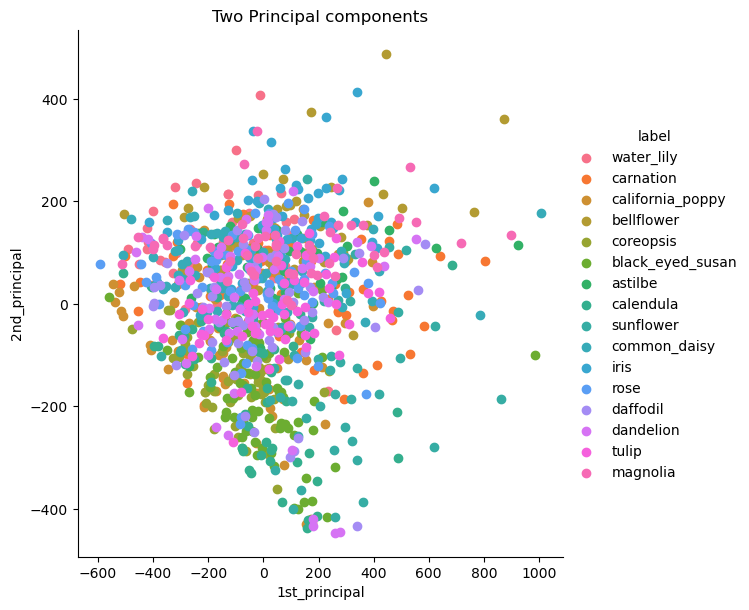

In [9]:
standardized_data = StandardScaler().fit_transform(matrix2)
# initializing the pca
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, matrix[:,1])).T
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two Principal components")
plt.show()

In [10]:
median=pca_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [11]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=16,init=init_centers).fit(pca_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


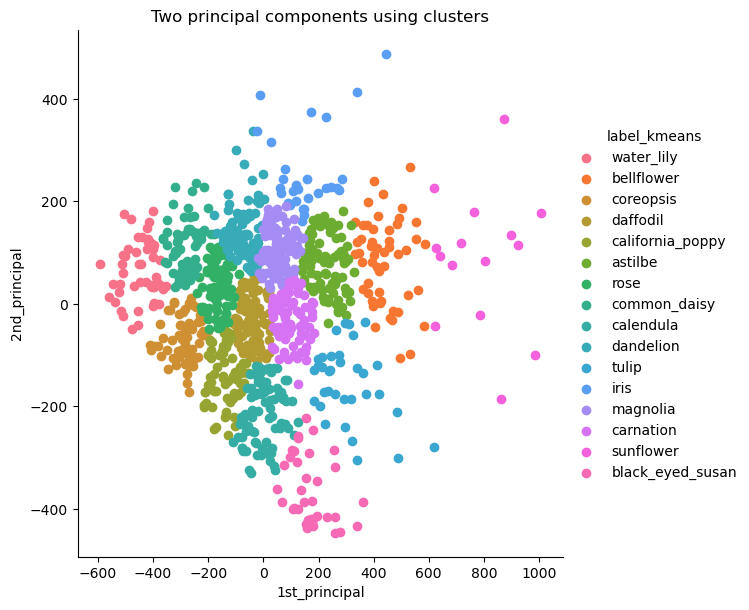

In [12]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(pca_df[["1st_principal", "2nd_principal"]])

pca_df['label_kmeans'] = median_values.index[labels]
sn.FacetGrid(pca_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [13]:
pca_df['matches']=(pca_df['label_kmeans']==pca_df["label"])*1
total_matches=pca_df["matches"].sum()
print("Accuracy:",(total_matches/len(pca_df))*100 )

Accuracy: 13.0


### MSD Flowers

In [16]:
standardized_data = MinMaxScaler().fit_transform(matrix2)
embedding = MDS(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, median_values.index[labels])).T

c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


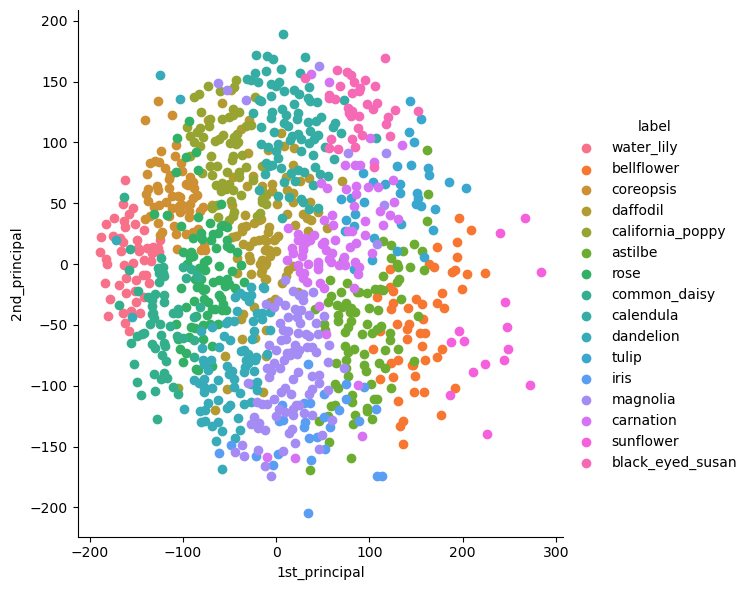

In [17]:
mds_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(mds_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Create clusters

In [18]:
median=mds_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [20]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=16,init=init_centers).fit(mds_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


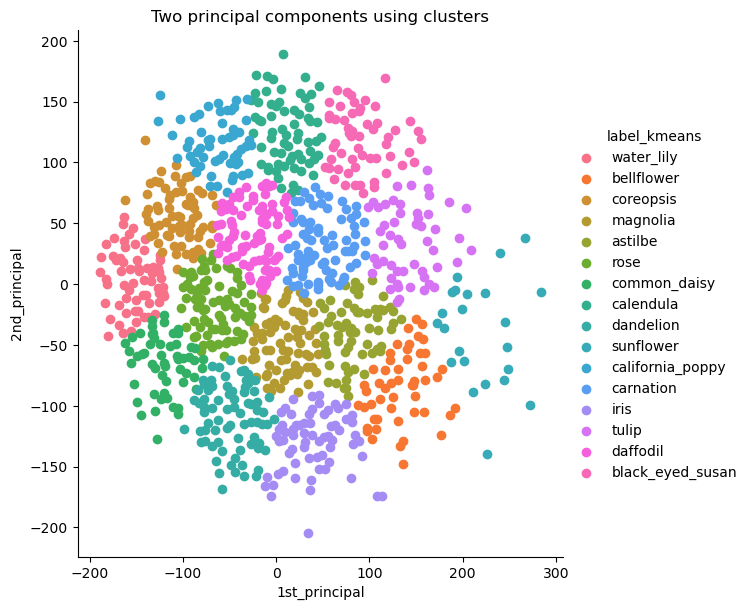

In [21]:
#%% Etiquetamos nuestro dataframe.
labels_mds = kmeans.predict(mds_df[["1st_principal", "2nd_principal"]])


mds_df['label_kmeans'] = median_values.index[labels_mds]
sn.FacetGrid(mds_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [22]:
mds_df['matches']=(mds_df['label_kmeans']==mds_df["label"])*1
total_matches=mds_df["matches"].sum()
print("Accuracy:",(total_matches/len(mds_df))*100 )

Accuracy: 62.1


### TSNE

In [23]:
standardized_data = MinMaxScaler().fit_transform(matrix2)
#(1797, 64)
embedding = TSNE(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, median_values.index[labels])).T

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


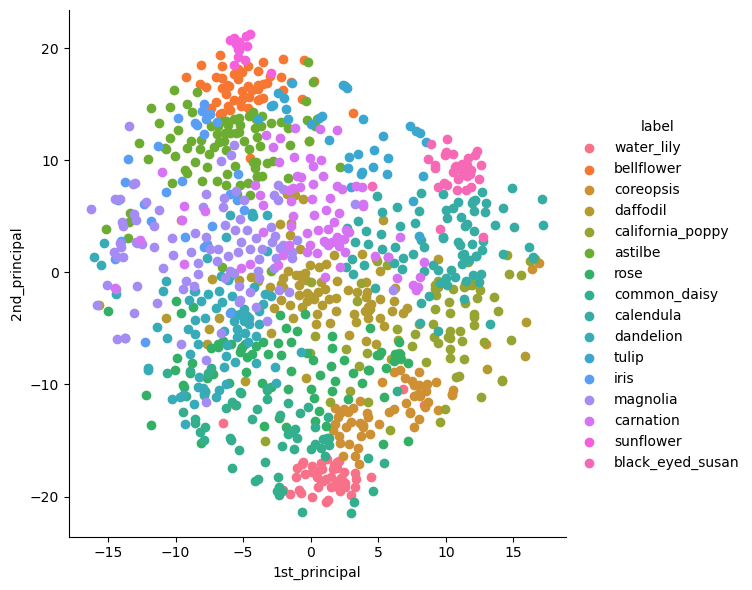

In [24]:
tsne_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Create clusters

In [25]:
median=tsne_df[["1st_principal","2nd_principal","label"]]
median_values=median.groupby("label").median()

In [26]:
init_centers = median_values.values
kmeans = KMeans(n_clusters=16,init=init_centers).fit(tsne_df[["1st_principal", "2nd_principal"]])
centroids = kmeans.cluster_centers_

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


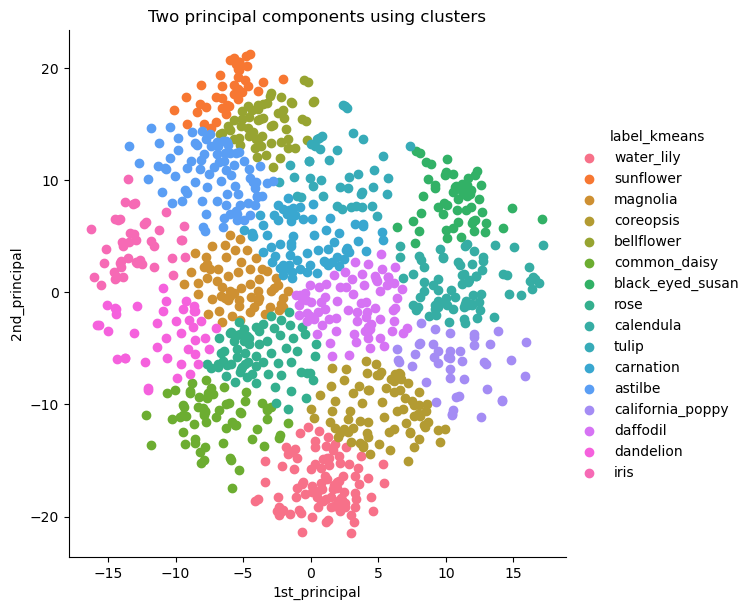

In [28]:
#%% Etiquetamos nuestro dataframe.
labels_tsne = kmeans.predict(tsne_df[["1st_principal", "2nd_principal"]])
tsne_df['label_kmeans'] = median_values.index[labels_tsne]
sn.FacetGrid(tsne_df, hue="label_kmeans", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title("Two principal components using clusters")
plt.show()

In [29]:
tsne_df['matches']=(tsne_df['label_kmeans']==tsne_df["label"])*1
total_matches=tsne_df["matches"].sum()
print("Accuracy:",(total_matches/len(tsne_df))*100 )

Accuracy: 50.0
